In [ ]:
# Description: This program uses an artificial recurrence neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of various companies using the past 60 day stock price.

In [ ]:
# Import the libraries
import tensorflow as tf
import math
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the panda 0.10.0 version to access the Yahoo finance data
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

# Re-start runtime
exit()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Confirm panda datareader version
pdr.__version__ 

'0.10.0'

In [ ]:
start = '2012-12-14'
end = '2022-12-14'
source = 'yahoo'

# Get the stock quote
df = pdr.DataReader('AAPL', data_source=source, start=start, end=end)

# Show the Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-14,18.504642,18.056429,18.383928,18.206785,1.009579e+09,15.657614
2012-12-17,18.571428,17.901072,18.176071,18.529642,7.576072e+08,15.935264
2012-12-18,19.103571,18.580357,18.750000,19.067858,6.256852e+08,16.398125
2012-12-19,19.060715,18.767857,18.981071,18.796785,4.493692e+08,16.165001
2012-12-20,18.935715,18.531429,18.928572,18.633215,4.816896e+08,16.024338
...,...,...,...,...,...,...
2022-12-08,143.520004,141.100006,142.360001,142.649994,6.212830e+07,142.649994
2022-12-09,145.570007,140.899994,142.339996,142.160004,7.606950e+07,142.160004
2022-12-12,144.500000,141.059998,142.699997,144.490005,7.046270e+07,144.490005


In [ ]:
# Get the number of rows and columns in the data set
df.shape

(2518, 6)

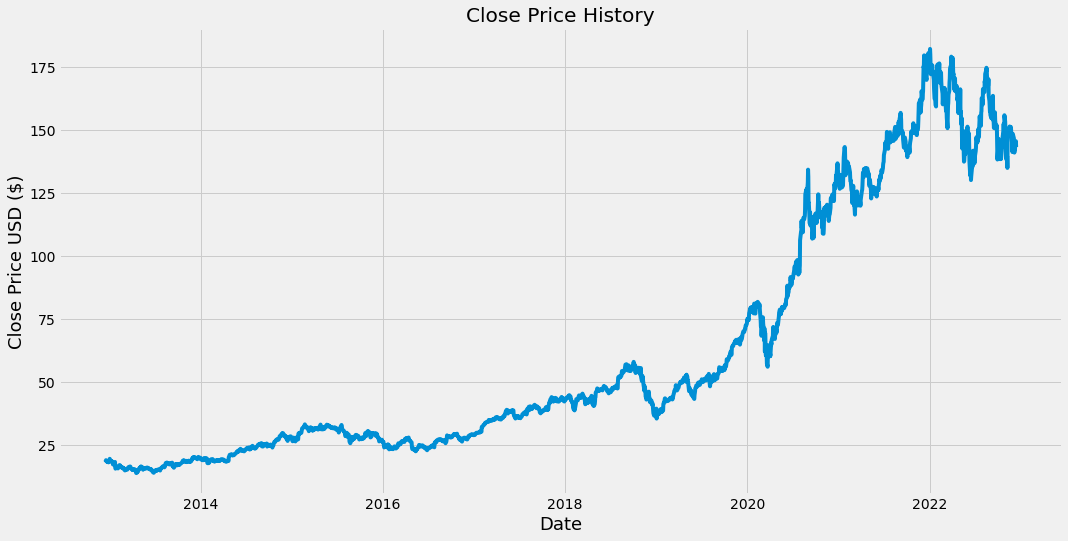

In [ ]:
# Visualize the history of the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the LSTM Model on
training_data_len = math.ceil(len(dataset) * 0.8)

# Print dataset length
training_data_len

2015

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Show the dataset
scaled_data

array([[0.02534346],
       [0.02726451],
       [0.03046699],
       ...,
       [0.77674978],
       [0.78258092],
       [0.76913357]])

In [ ]:
# Create training dataset
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train datasets
# x_train <- independent variables
x_train = []
# y_train <- dependent variables
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()  

[array([0.02534346, 0.02726451, 0.03046699, 0.02885406, 0.02788079,
       0.02737077, 0.02754927, 0.0260256 , 0.02646337, 0.02530096,
       0.03009934, 0.03368219, 0.03220953, 0.02900069, 0.02834192,
       0.02864155, 0.02689688, 0.02825905, 0.02757691, 0.02363492,
       0.02027095, 0.02455719, 0.02383254, 0.02326303, 0.02427668,
       0.02624024, 0.01274399, 0.01048717, 0.0126016 , 0.01439515,
       0.01408915, 0.01380439, 0.013407  , 0.01100568, 0.01430378,
       0.01419965, 0.01650959, 0.01794613, 0.01899803, 0.01644159,
       0.01625246, 0.01616321, 0.01479679, 0.01476066, 0.01239335,
       0.01180045, 0.01280986, 0.01110769, 0.01241885, 0.01148382,
       0.01081018, 0.00848749, 0.00627318, 0.00862986, 0.00746533,
       0.00851086, 0.00875312, 0.01006003, 0.00805397, 0.00803697])]
[0.008918878838389946]

[array([0.02534346, 0.02726451, 0.03046699, 0.02885406, 0.02788079,
       0.02737077, 0.02754927, 0.0260256 , 0.02646337, 0.02530096,
       0.03009934, 0.03368219, 0.0

In [ ]:
# Convert the x_train and y_train to numpy arrays to use to train LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the x_train dataset from 2D to 3D for LSTM
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1955, 60, 1)

In [ ]:
# Build the LSTM model and add layers
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1955/1955 [==============================] - 61s 30ms/step - loss: 8.0298e-04


In [ ]:
# Create the testing dataset
# Create a new array containing scaled values from index 1555 to 2015
test_data = scaled_data[training_data_len - 60:, :]

# Create the datasets x_test and y_test
# x_test contains past 60-day values
x_test = []
# y_test contains 61st value for prediction
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data into to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data from 2D to 3D for LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 17ms/step


In [ ]:
# Get the root mean squared error (RSME) for fit test
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

6.7417539289410024

<ipython-input-23-ba897240b090>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


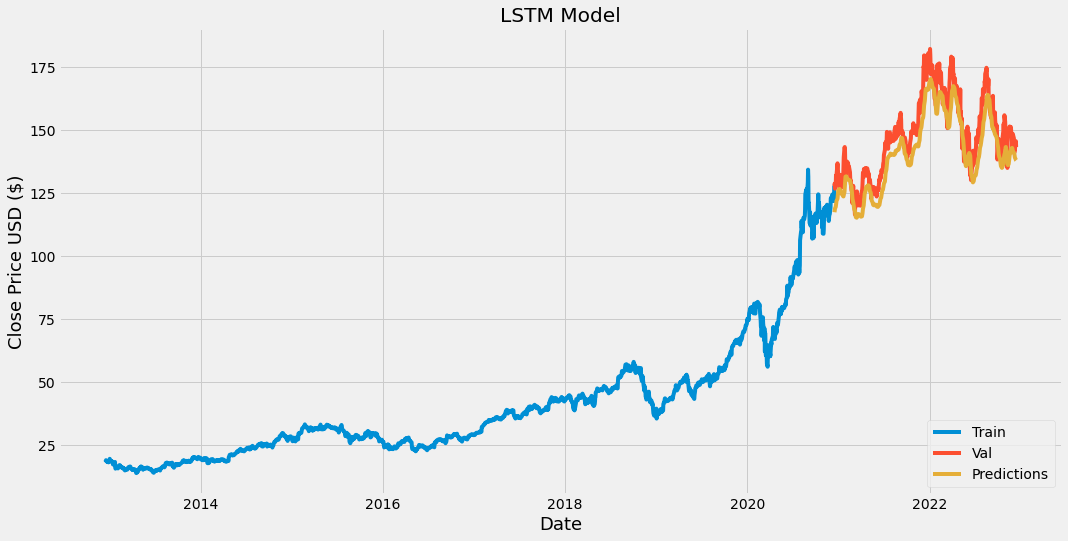

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-12-16,127.809998,117.310585
2020-12-17,128.699997,117.995750
2020-12-18,126.660004,118.809364
2020-12-21,128.229996,119.451729
2020-12-22,131.880005,120.079071
...,...,...
2022-12-08,142.649994,139.689438
2022-12-09,142.160004,139.002518
2022-12-12,144.490005,138.348297


In [ ]:
# Get the quote
end = '2022-12-15'

apple_quote = pdr.DataReader('AAPL', data_source = source, start=start, end=end)

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days to the X_test
X_test.append(last_60_days_scaled)

# Convert the X_test data 
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 22ms/step
[[137.00548]]


In [ ]:
# Get the actual quote
apple_quote2 = pdr.DataReader('AAPL', data_source = source, start=end, end=end)
print(apple_quote2['Close'])

Date
2022-12-15    136.5
Name: Close, dtype: float64
